In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv(r"C:/Users/vista/OneDrive/Documents/swetha/Python-Projects-Uber-Trips-Analysis/Data/uber-raw-data-sep14.csv")


In [5]:
data["Date/Time"] = data["Date/Time"].map(pd.to_datetime) 
data.head()

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512


In [6]:
# Data analysis according to days and hours
data["Day"] = data["Date/Time"].apply(lambda x: x.day)
data["Weekday"] = data["Date/Time"].apply(lambda x: x.weekday())
data["Hour"] = data["Date/Time"].apply(lambda x: x.hour)
print(data.head())

            Date/Time      Lat      Lon    Base  Day  Weekday  Hour
0 2014-09-01 00:01:00  40.2201 -74.0021  B02512    1        0     0
1 2014-09-01 00:01:00  40.7500 -74.0027  B02512    1        0     0
2 2014-09-01 00:03:00  40.7559 -73.9864  B02512    1        0     0
3 2014-09-01 00:06:00  40.7450 -73.9889  B02512    1        0     0
4 2014-09-01 00:11:00  40.8145 -73.9444  B02512    1        0     0


<AxesSubplot:xlabel='Day'>

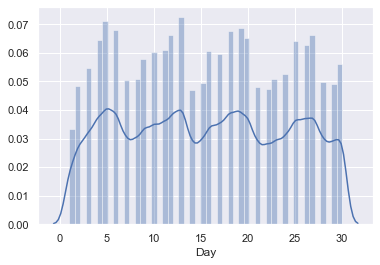

In [7]:
#to check on which day uber trip were high
sns.set(rc={'figure.figsize':(12, 10)})
sns.distplot(data["Day"])

<AxesSubplot:xlabel='Hour'>

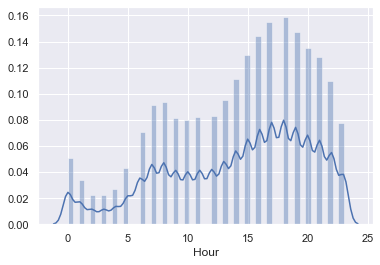

In [8]:
# to check uber trips according to hours
sns.distplot(data["Hour"])

<AxesSubplot:xlabel='Weekday'>

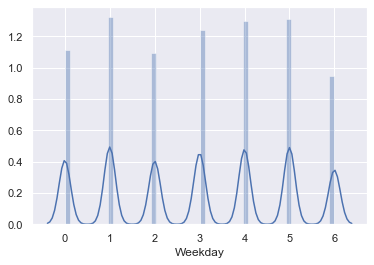

In [9]:
# to check uber trips at weekends
sns.distplot(data["Weekday"])

<AxesSubplot:xlabel='Hour', ylabel='Weekday'>

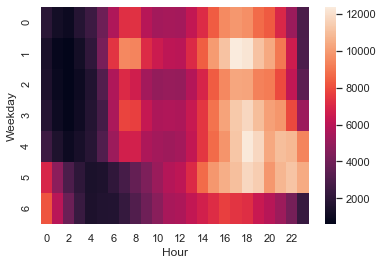

In [10]:
# Correlation of Weekday and Hour
df = data.groupby(["Weekday", "Hour"]).apply(lambda x: len(x))
df = df.unstack()
sns.heatmap(df, annot=False)

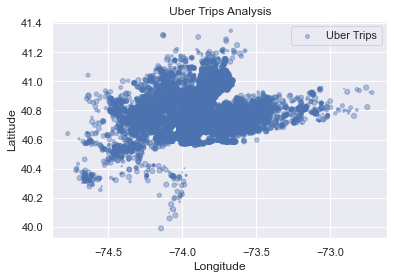

In [15]:

plt.scatter(x=data['Lon'], y=data['Lat'], alpha=0.4, s=data['Day'], label='Uber Trips', cmap='jet')
plt.title("Uber Trips Analysis")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()